<h1 style='color: green; font-size: 30px; font-weight: bold;'>Data Science - Regressão Linear: de baixo dos panos</h1>

# <font color='black' style='font-size: 24px;'>1.1 Conhecendo o Dataset</font>
<hr style='border: 2px solid black;'>

## Importando o numpy, pandas e random

In [1]:
import numpy as np
import pandas as pd
import random
random.seed(42)

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 15px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso dataset é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 15px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel;</li>
    <li><b>Area</b> - Área do imóvel em m².</li>
</ul>

In [2]:
dados = pd.read_csv('Dados/dados_regressao_simples.csv')

In [3]:
dados.head()

,Valor,Area
0,4600000,280
1,900000,208
2,2550000,170
3,550000,100
4,2200000,164


In [4]:
valor = np.log(dados['Valor'])
area = np.log(dados['Area'])

valor = np.array(valor)
area = np.array(area)

Podemos então definir uma hipótese a partir das constantes $\alpha$ e $\beta$ tal que:

$$y_i = \theta_1 x_i + \theta_0 + \epsilon_i$$

Sendo $y_i$ é o valor de um determinado imóvel, $x_i$ é a área deste mesmo imóvel e o termo $\epsilon_i$ é o termo de erro (esperamos que pequeno) representando que existem fatores não levados em consideração para este modelo simples.

Supondo que temos $\theta_0$ e $\theta_1$, podemos fazer uma previsão através facilmente.

In [5]:
def prever(theta0, theta1, x_i):
    return theta0 + theta1*x_i

Como vamos escolher as constântes $\theta_0$ e $\theta_1$?

Sabendo que podemos calcular a saída prevista com a função "predict" e sabendo qual é a saída real, é possível calcularmos o erro de cada previsão fazendo a diferença entre a saída real e a saída prevista.

In [6]:
def erro(theta0, theta1, x_i, y_i):
    return y_i - prever(theta0, theta1, x_i)

No entanto esta função de erro calcula apenas o erro de uma saída, e não de todas elas. Ainda que podemos ter uma saída com erro positivo cancelando uma outra saída com erro negativo. Então, devemos somar todos os erros e elevá-los ao quadrado para que todos erros sejam positivos.

In [7]:
def soma_erro_quadratico(theta0, theta1, X, y):
    return 1/len(X) * sum(erro(theta0, theta1, x_i, y_i) ** 2 for x_i, y_i in zip(X,y))

Agora podemos ver a regressão como um problema de otimização. Devemos minimizar esta função de soma dos erros quadráticos. Para isto, vamos utilizar a técnica do gradiente descendente. Primeiramente, vamos definir a derivada da função de custo em relação a $\alpha$ e $\beta$.

$$
\frac{\delta}{\delta\theta_0} = y(x_i) - y_i
$$

$$
\frac{\delta}{\delta\theta_1} = (y(x_i) - y_i)x_i
$$

In [8]:
def derivada(theta0, theta1, X, y):
    dtheta0 = 0
    dtheta1 = 0
    for x_i, y_i in zip(X, y):
        dtheta0 += prever(theta0, theta1, x_i) - y_i
        dtheta1 += (prever(theta0, theta1, x_i) - y_i)*x_i

    dtheta0 /= 0.5*len(X)
    dtheta1 /= 0.5*len(X)

    return dtheta0, dtheta1

Agora queremos realizar o processo de otimização de nossa função de custo. Para isto, vamos atulizar o valor de nossas variáveis $\theta_0$ e $\theta_1$. Vamos criar um parâmetro novo para nosso algoritmo, vamos chamá-lo de taxa de aprendizado ($\alpha$), será um número pequeno para dizer o quanto queremos atualizar nossos parâmetros.

$$
\theta_0 = \theta_0 - \alpha\frac{\delta}{\delta\theta_0}
$$

$$
\theta_1 = \theta_1 - \alpha\frac{\delta}{\delta\theta_1}
$$

In [9]:
def gradienteDescendente(theta0, theta1, X, y, alpha):
    dtheta0, dtheta1 = derivada(theta0, theta1, X, y)
    theta0 = theta0 - (alpha * dtheta0)
    theta1 = theta1 - (alpha * dtheta1)

    return theta0, theta1

In [10]:
theta0 = random.random()
theta1 = random.random()
    
for i in range(10000):
    if i % 1000 == 0:
        print(soma_erro_quadratico(theta0, theta1,area, valor))
    theta0, theta1 = gradienteDescendente(theta0, theta1, area, valor, 0.01)

168.22116350027557
0.6593029559163837
0.4998600491553367
0.40968166189261374
0.3586781917821899
0.3298314354554651
0.31351616614591193
0.3042885077697542
0.29906949008199546
0.29611769619076406


In [11]:
print(theta0)
print(theta1)

7.424430958943951
1.3545668505867476


In [12]:
def r_2(theta0,theta1, X, y):
    previsto = prever(theta0, theta1, area)
    
    variancia_prevista = sum([(y[i] - previsto[i]) ** 2 for i in range(len(X))])
    variancia_original = sum([(y[i] - y.mean()) ** 2 for i in range(len(X))])
    
    return 1 - variancia_prevista / variancia_original

In [13]:
r_2(theta0, theta1, area, valor)

0.6393131110901082

## Visualizando nossos resultados de forma gráfica

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

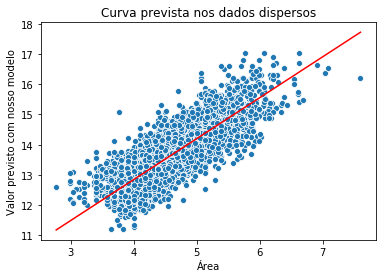

In [35]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area,y = prever(theta0, theta1,area), color='red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com nosso modelo')
plt.show()

## Comparando com um modelo do sk-learn

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
lr = LinearRegression()

In [24]:
lr.fit(area.reshape(len(area),1), valor)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

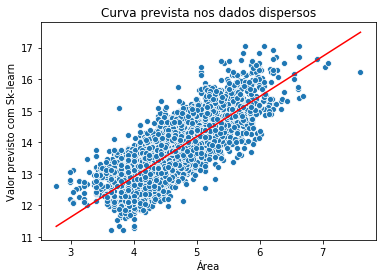

In [33]:
ax = sns.scatterplot(x=area, y=valor)
ax = sns.lineplot(x=area,y = lr.predict(area.reshape(len(area),1)), color='red')

ax.set_title('Curva prevista nos dados dispersos')
ax.set_xlabel('Área')
ax.set_ylabel('Valor previsto com Sk-learn')
plt.show()

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(valor, lr.predict(np.array(area).reshape(len(area),1)))

0.6419756524871572